In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import *
init_printing()
t,ki,kv,be,nv0,x = symbols(r't,k_I,k_V,\beta,N_{V0},X')
t,ki,kv,be,nv0,x

# Model Action of Antiviral Drug
$$
N_V(t) = \frac{\beta}{k_V-k_I}e^{-k_It}+(N_{V0}-\frac{\beta}{k_V-k_I})e^{-k_Vt}
$$

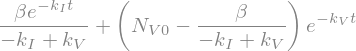

In [2]:
f = be/(kv-ki)*exp(-ki*t)+(nv0-be/(kv-ki))*exp(-kv*t)
f

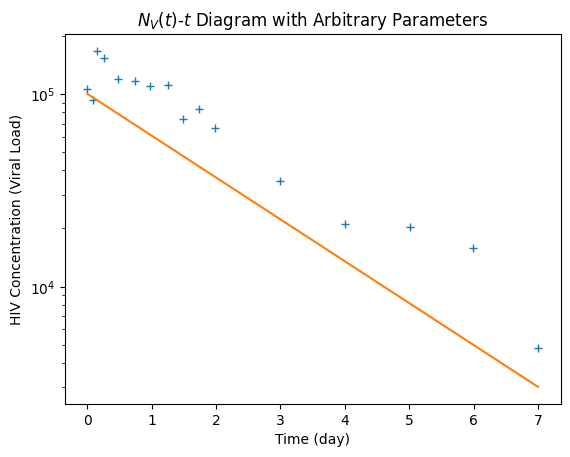

In [3]:
g = lambdify([t],f.subs({kv:0.5,ki:0.4,nv0:1e5,be:1}),'numpy')
data = pd.read_csv('./HIVseries.csv')
time = data['time']
Nv = data['c']
plt.semilogy(time,Nv,'+')
plt.xlabel('Time (day)')
plt.ylabel('HIV Concentration (Viral Load)')
plt.title(r'$N_V(t)$-$t$ Diagram with Arbitrary Parameters')
plt.plot(time,g(time))

## Determine Two Parameters by Linear Regression

In [4]:
longterm = 10
start = -10
k,b = np.polyfit(time[start:],np.log(Nv[start:]),1)
k,b

**It should be noted that the linear regression was performed under the natural logarithm instead of common logarithm, which is critical for the overall and final fitting.** Perhaps the reason behinds it is that the characteristic modes are based on natural exponential function. However, for the sake of clarity and intuitive sense, I still choose common logarithm to be y axis scale.

In [5]:
ki_tmp = -k
x_tmp = exp(b)
g=x*exp(-ki*t)
g

### $k_I$

In [6]:
ki_tmp

### $X$

In [7]:
x_tmp

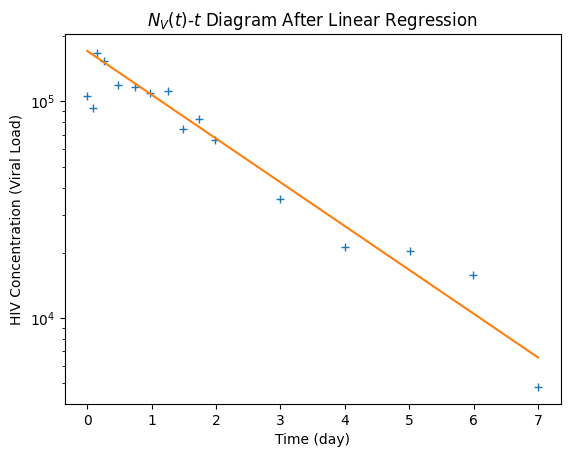

In [8]:
g = lambdify([t],g.subs({ki:ki_tmp,x:x_tmp}),'numpy')
data = pd.read_csv('./HIVseries.csv')
time = data['time']
Nv = data['c']
plt.semilogy(time,Nv,'+')
plt.xlabel('Time (day)')
plt.ylabel('HIV Concentration (Viral Load)')
plt.title(r'$N_V(t)$-$t$ Diagram After Linear Regression')
plt.plot(time,g(time))

In [9]:
f = x*exp(-ki*t)+(nv0-x)*exp(-kv*t)
f

### With Additional Constraint
$$
\frac{dN_V}{dt}|_{t=0}=0
$$

In [10]:
diff(f,t)

In [11]:
Eq(diff(f,t).subs(t,0),0)

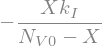

In [12]:
kv_tmp=solve(Eq(diff(f,t).subs(t,0),0),kv)[0]
kv_tmp

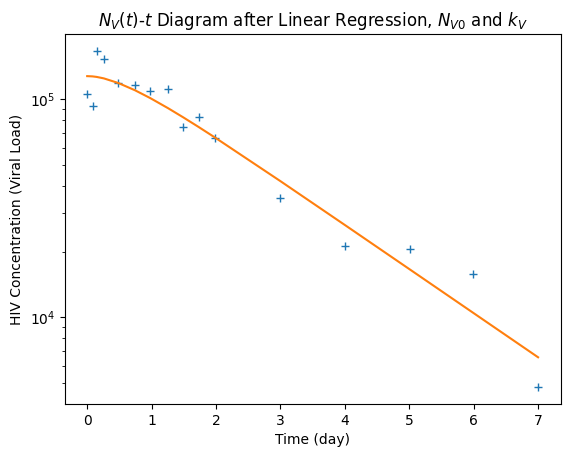

In [13]:
nv0_mean = np.mean(data['c'][0:5])
kv_tmp = kv_tmp.subs({x:x_tmp,ki:ki_tmp,nv0:nv0_mean})
g = lambdify([t],f.subs({kv:kv_tmp,ki:ki_tmp,nv0:nv0_mean,x:x_tmp}),'numpy')
data = pd.read_csv('./HIVseries.csv')
time = data['time']
Nv = data['c']
plt.semilogy(time,Nv,'+')
plt.xlabel('Time (day)')
plt.ylabel('HIV Concentration (Viral Load)')
plt.title(r'$N_V(t)$-$t$ Diagram after Linear Regression, $N_{V0}$ and $k_V$')
plt.plot(time,g(time))

In [14]:
1/ki_tmp

The reciprocal of the T cell infection rate is just approximate two days, which is much shorter than the latency period of ten years. The data supports the claim.

### In Terms of Half-Life

For Virions (in unit of day)

In [15]:
tv = ln(2)/kv_tmp
float(tv)

For infected T cells (in unit of day)

In [16]:
ti = ln(2)/ki_tmp
float(ti)